<a href="https://colab.research.google.com/github/tyra0509/jejumaster/blob/main/%EA%B3%BC%EC%A0%9C1_%EC%9D%B4%EB%AA%85%EC%88%9C11111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 탐색적데이터 분석

## 3. 공공 데이터 분석- 인구 고령화



---



In [18]:
PATH = './sample_data/' #데이터폴더 위치다.   ./ 는 현재위치일때.
FILE = '고령인구비율.csv'

## [퀴즈] 전국 성씨 순위구하기

In [9]:
import pandas as pd #데이터를 표 형식으로 보려고 판다스
import matplotlib.pyplot as plt #그래프로 보려고 맷플로

family_name = '이'

file = PATH+FILE #문자열붙여줌

df = pd.read_csv(file, encoding = 'utf-8') #cp949: 윈도우OS 기본 인코딩 포맷

df #셀에서의 마지막코드는 프린트문 없이 보여준다
df.columns = ['성씨', '지역', '인구']
print(f'파일명: {file}')
df = df.query(" 지역 == '전국' and 성씨 != '계'")

# 성씨에서 한자 제외시키기 -----------
tmp1, tmp2, tmp3 = list(), list(), list()
for row in df.iterrows(): # 한 칸씩 불러와라
    tmp1.append(row[1]['성씨'].split('(')[0]) #가로로 나눠서분리해서
    tmp2.append(row[1]['지역'])
    tmp3.append(row[1]['인구'])

df_all = pd.DataFrame([ x for x in zip(tmp1,tmp2,tmp3)])
df_all.columns = df.columns
df_all
#-------------------------------------

# 한자를 다르게 쓰는 [성씨]를 [지역]별로 합계 구하기
df_all_group = df_all.groupby('성씨').sum(numeric_only=False)

# 지역별 합계 데이터를 '인구' 크기순으로 정렬하기
df_all_group = df_all_group.sort_values(by = '인구', ascending = False)

# 파일명 지정하여 저장하기
file = PATH+'my_family_name_ranking.csv'  # 파일명
df_all_group.to_csv(file, encoding = 'cp949', mode = 'w') # 파일 저장하기

# df_all_group.head(10)

ValueError: ignored

----------------------------------

## 구씨를 찾아라!

### 3-1.파이썬으로 데이터 분석하는 순서
 [사전준비] 필요한 파이썬 라이브러리 설치하기
 1. 데이터 준비하기 : 웹 사이트에서 공공데이터 다운로드하기
 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
 3. 데이터 전처리하기 : 필요한 데이터만 추출하기
 4. 데이터 시각화하기 : 데이터 그래프로 나타내기
 5. 데이터 저장하기 :  파일로 저장하기

---

**[주의!] (코랩)한글 폰트 지정하는 방법**

In [19]:
!sudo apt-get install -y fonts-nanum #폰트설치하라는 명령어. sudo관리자권한
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>런타임 다시 시작" 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

### 0.[사전준비] 라이브러리 설치 확인하기
아래 코드를 실행한 후 오류 메시지가 없으면 성공적으로 설치된 것입니다.

In [20]:
import pandas  as pd
import numpy as np
import matplotlib as plt
print(pd.__version__)
print(np.__version__)
print(plt.__version__)

1.5.3
1.23.5
3.7.1


### 1.데이터 다운로드하기

- 국가통계포털 사이트  https://kosis.kr/index/index.do
- 성씨ㆍ본관별_인구__시군구_~.csv 다운로드하기
 - ./sample_data/자신이다운로드한파일

---

### 2.데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
파일명(성씨ㆍ본관별_인구__시군구_~.csv)에서 뒷부분 숫자는 다운로드된 날짜의 시간정보로 선생님과 다를 수 있으니 자신이 다운로드 받은 파일명을 사용하면 됩니다.

In [30]:
import pandas as pd

PATH ='./sample_data/'
FILE ='고령인구비율.csv'
file = PATH+FILE
df = pd.read_csv(file, encoding = 'utf-8') #cp949: 윈도우OS 기본 인코딩 포맷
df.head(3)

,행정구역별(1),2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020,2022
0,행정구역별(1),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%)
1,서울특별시,5.4,6.0,6.8,7.7,8.7,9.7,10.8,12.0,13.0,14.4,16.1,17.6
2,부산광역시,6.0,6.8,7.8,8.9,10.2,11.3,12.5,14.0,15.3,17.1,19.4,21.5


---

### 3.데이터 전처리하기 : 필요한 데이터만 추출하기 삭제하기

#### @컬럼이름 변경하기

In [31]:
# 현재 컬럼이름 출력하기
df.columns #df는 데이터프레임 약자로 변수 만든 것

Index(['행정구역별(1)', '2000', '2002', '2004', '2006', '2008', '2010', '2012',
       '2014', '2016', '2018', '2020', '2022'],
      dtype='object')

In [32]:
# 컬럼이름 변경하기
df.columns = ['행정구역별', '2000', '2002', '2004', '2006', '2008', '2010', '2012',
       '2014', '2016', '2018', '2020', '2022']
df.columns

Index(['행정구역별', '2000', '2002', '2004', '2006', '2008', '2010', '2012', '2014',
       '2016', '2018', '2020', '2022'],
      dtype='object')

In [33]:
df.drop('행정구역별', axis=0, inplace=True) #행=0, 열=1
#df.drop('검색일자', axis=1, inplace=True)
df

KeyError: ignored

#### @고유한 성씨만 출력하기

In [34]:
df

,행정구역별,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020,2022
0,행정구역별(1),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%),고령인구비율<br>(A÷B×100) (%)
1,서울특별시,5.4,6.0,6.8,7.7,8.7,9.7,10.8,12.0,13.0,14.4,16.1,17.6
2,부산광역시,6.0,6.8,7.8,8.9,10.2,11.3,12.5,14.0,15.3,17.1,19.4,21.5
3,대구광역시,5.9,6.6,7.4,8.3,9.3,10.0,10.9,12.2,13.2,14.7,16.6,18.4
4,인천광역시,5.4,5.9,6.6,7.2,8.0,8.6,9.4,10.3,11.0,12.3,14.0,15.6
5,광주광역시,5.6,6.1,6.8,7.5,8.3,9.0,9.9,10.8,11.7,12.8,14.2,15.6
6,대전광역시,5.5,6.0,6.6,7.2,8.1,8.7,9.4,10.3,11.3,12.7,14.4,16.1
7,울산광역시,4.0,4.4,5.0,5.6,6.3,6.8,7.5,8.3,9.3,10.7,12.6,14.7
8,세종특별자치시,-,-,-,-,-,-,15.2,12.7,10.0,9.3,9.8,10.5
9,경기도,5.7,6.2,6.8,7.4,8.1,8.7,9.4,10.2,10.8,11.9,13.2,14.7


In [ ]:
# 고유한 성씨(한자포함) 출력하기
set(df['성씨'])

In [ ]:
# 고유한 성씨(한자포함) 총개수 출력하기
len(set(df['성씨']))

155

In [ ]:
set( name.split('(')[0]for name in set(df['성씨'])'))

SyntaxError: ignored

In [ ]:
# 한글 성씨만 출력하기 -> '가(賈)'--> 가  만 추출하기
for name in set (df['성씨']):
    tmp = name.split('(')[0]
    print(tmp)
familyname = set(name.split('(')[0] for name in set(df['성씨']) )
familyname

# 고유한 한글 성씨 총개수 출력하기
len(familyname)

---------------------

In [ ]:
df.head()
df['성씨'] #시리즈데이터

#### @[성씨]가  '구'인 데이터 추출하기

In [36]:
# [성씨] 열에서 '구'가 포함된 데이터 출력하기
df[df['행정구역별'].str.contains('경기도')] #구씨 포함된 데이터. df[df['성씨']=구 라고 하면 오류


# [성씨] 열에서 '구'가 포함되고, [지역] 열에서 '전국' 제외하고 가져오기
# df_goo = df[df['성씨'].str.contains('구') & (df['지역'] != '전국')]
# df_goo

,행정구역별,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020,2022
9,경기도,5.7,6.2,6.8,7.4,8.1,8.7,9.4,10.2,10.8,11.9,13.2,14.7


### **[실습문제] 자신의 성씨 데이터 출력하기**


In [37]:
# [성씨] 열에서 '구'가 포함되고, [지역] 열에서 '전국' 제외하고 가져오기
df_my = df[df['행정구역별'].str.contains('') & (df['지역'] != '전국')]
df_my

KeyError: ignored

#### @데이터 그룹핑: ‘구’씨 성을 가진 데이터를 [지역]별로 [인구] 합계 출력하기

In [ ]:
# 1.'구'씨 데이터를 [지역]별 합계 구하기
# df_goo_group = df_goo.groupby('지역').sum()
df_goo_group = df_goo.groupby('지역').sum(numeric_only=False)
# df_goo_group


# 2.지역별 합계 데이터를 '인구' 크기순으로 정렬하기
df_goo_group = df_goo_group.sort_values(by = '인구', ascending = False) #인구수 정렬
df_goo_group

,성씨,인구
지역,,
경기도,구(丘)구(具),47572
서울특별시,구(丘)구(具),38857
경상남도,구(丘)구(具),20367
부산광역시,구(丘)구(具),17871
대구광역시,구(丘)구(具),15313
인천광역시,구(丘)구(具),12028
충청남도,구(丘)구(具),10061
경상북도,구(丘)구(具),10000
대전광역시,구(丘)구(具),6295


### **[실습문제] 자신의 한글 성씨 데이터를 [지역]별로 [인구] 합계 출력하기**

In [ ]:
# 자신의 한글 성씨 데이터를 지역별 합계 데이터를 '인구' 크기순으로 정렬하기
df_my_group = df_my.groupby('지역').sum(numeric_only=False)
df_my_group = df_my_group.sort_values(by = '인구', ascending = False)
df_my_group

,성씨,인구
지역,,
경기도,이(李),1856028
서울특별시,이(李),1441796
부산광역시,이(李),469587
경상남도,이(李),441464
인천광역시,이(李),424803
경상북도,이(李),391378
대구광역시,이(李),374123
충청남도,이(李),327336
전라북도,이(李),251483


---------------------------

### 4.데이터 시각화하기 : 데이터 그래프로 나타내기
- 색상 참고 :  https://matplotlib.org/stable/gallery/color/named_colors.html

#### @막대 그래프로 시각화하기

In [ ]:
df_goo_group.columns

Index(['성씨', '인구'], dtype='object')

In [ ]:
df_goo_group.index

Index(['경기도', '서울특별시', '경상남도', '부산광역시', '대구광역시', '인천광역시', '충청남도', '경상북도',
       '대전광역시', '전라북도', '충청북도', '광주광역시', '전라남도', '울산광역시', '강원도', '제주특별자치도',
       '세종특별자치시'],
      dtype='object', name='지역')

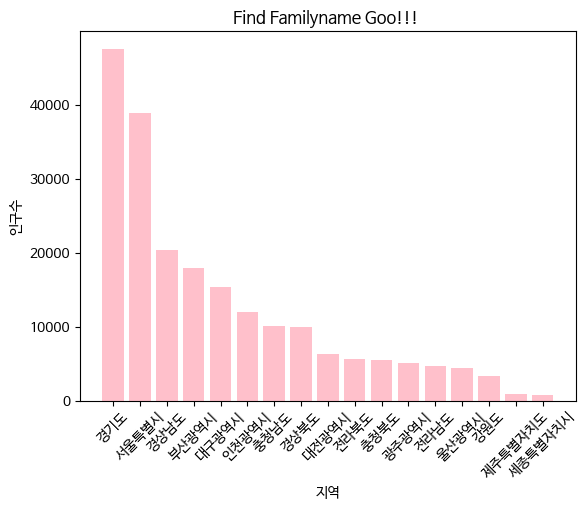

In [ ]:
import matplotlib.pyplot as plt

# 코랩에서 한글 폰트 설치한 후 사용하기!!!
# plt.rc('font', family='cmb10')                  # (코랩)한글 폰트
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트
# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트


# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index     # 지역
y = df_goo_group['인구']   # 인구수

# 2.그래프 그리기
plt.bar(x, y, color='pink')

# 3. 그래프 꾸미기
# plt.title('대한민국 "구씨"를 찾아라') # 그래프 제목
plt.title('Find Familyname Goo!!! ') # 그래프 제목
plt.xlabel('지역')                    # x축 이름
plt.ylabel('인구수')                  # y축 이름
plt.xticks(rotation = 45)             # X축 레이블 회전
plt.show()                            # 그래프 출력하기

#### @그래프 꾸미기

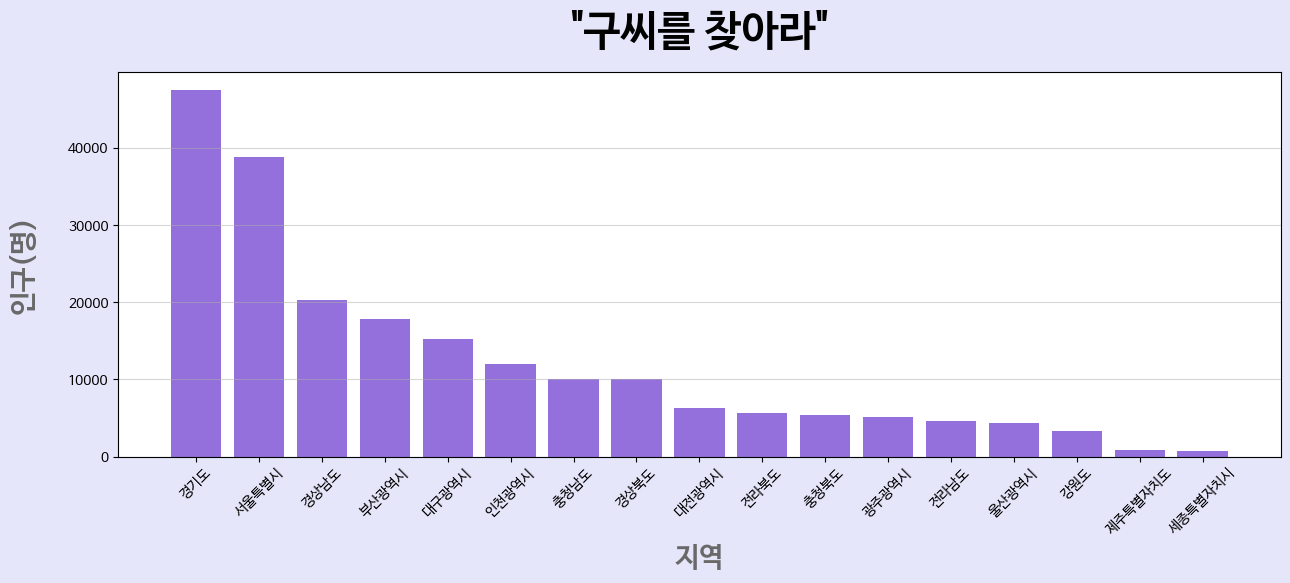

In [ ]:
import matplotlib.pyplot as plt

# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index     # 지역
y = df_goo_group['인구']   # 인구수

# 2.그래프 그리기
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.bar(x, y, color = 'mediumpurple')  # 막대 그래프 그리기

# 3. 그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                   # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)    # 그래프에 그리드(격자) 알파(투명도)표현하기

plt.show() # 그래프 그리기

#### @선 그래프로 시각화하기

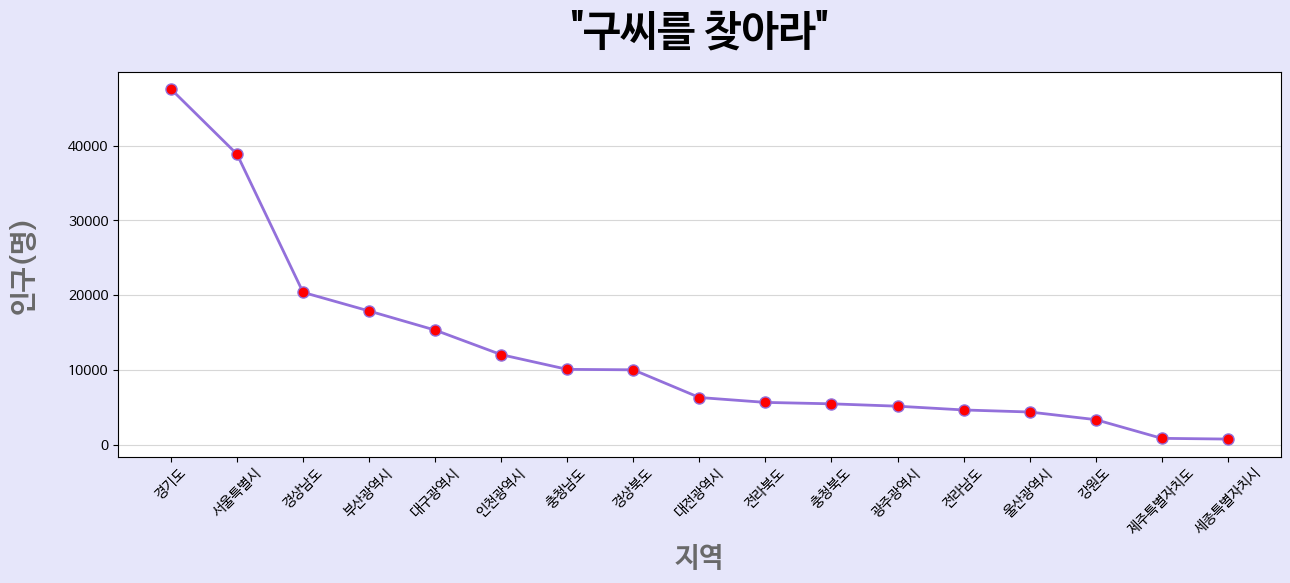

In [ ]:
# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index     # 지역
y = df_goo_group['인구']   # 인구수

# 2.그래프 그리기 (선그래프 그리기)
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.plot(x, y, color='mediumpurple', marker='o', linestyle='solid',
         linewidth=2, markersize=8, markerfacecolor='red') #plot(선그래프)

# 3. 그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                   # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)    # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

#### @혼합 그래프

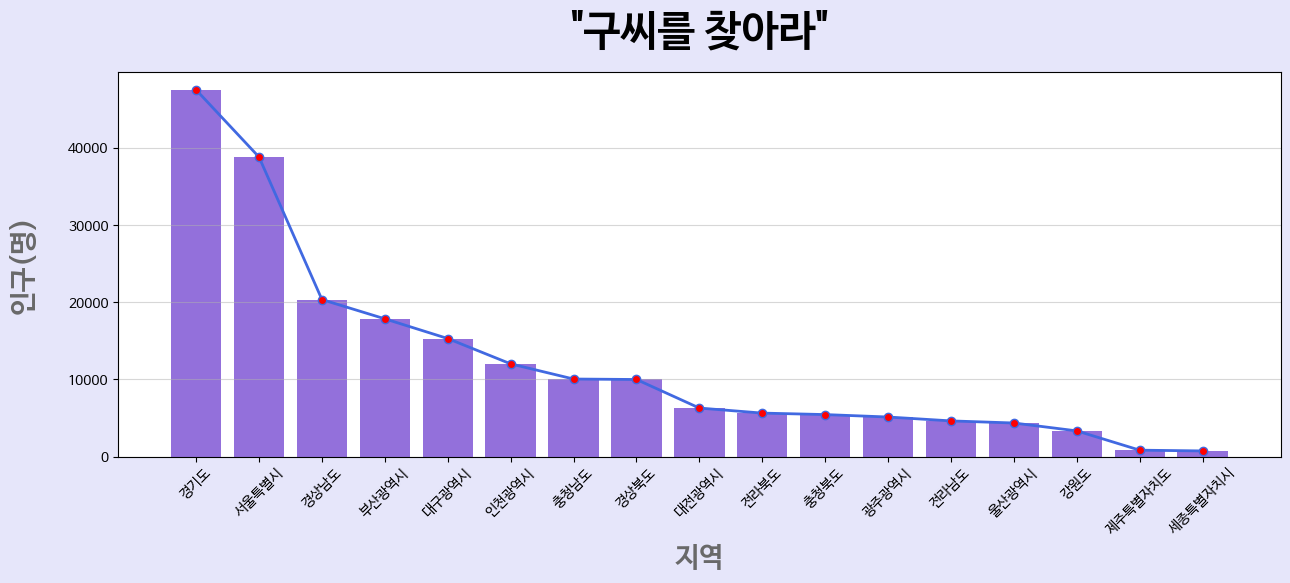

In [ ]:
import matplotlib.pyplot as plt


# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index     # 지역
y = df_goo_group['인구']   # 인구수

# 2.그래프 그리기
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.bar(x, y, color = 'mediumpurple')          # 막대 그래프
plt.plot(x, y, color='royalblue', marker='o',  # 선 그래프
         linewidth=2, markerfacecolor='red')

# 3.그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                 # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)  # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

### 5. 데이터 저장하기 : 데이터 파일로 저장하기

In [ ]:
# 파일명 지정하여 저장하기
file = './sample_data/family_name_goo.csv'  # 파일명
df_goo_group.to_csv(file, encoding = 'utf-8', mode = 'w') # 파일 저장하기 csv로

-----------------------------------------

### **[실습문제] 워드클라우드로 시각화하기**

In [ ]:
# 라이브러리 설치하기
!pip install wordcloud

{'경기도': 47572, '서울특별시': 38857, '경상남도': 20367, '부산광역시': 17871, '대구광역시': 15313, '인천광역시': 12028, '충청남도': 10061, '경상북도': 10000, '대전광역시': 6295, '전라북도': 5640, '충청북도': 5449, '광주광역시': 5132, '전라남도': 4628, '울산광역시': 4355, '강원도': 3332, '제주특별자치도': 830, '세종특별자치시': 732}


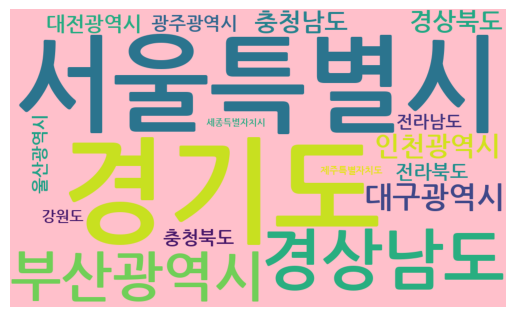

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. (win)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
# font_path = 'malgun'  # C:/Windows/Fonts/
# font_path = 'HMFMOLD' # C:/Windows/Fonts/HMKMMAG.TTF     #HMFMOLD.TTF

# 1. (코랩)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf' #한글폰트

# 2.전처리된 데이터 지정하기
names = df_goo_group.index     # 지역
counts = df_goo_group['인구']  # 인구수
data = dict(zip(names, counts)) # 워드클라우드는 딕셔너리 형태로 만들기. x,y축 개념
print(data)

# 3.워드클라우드 그래프로 시각화하기
wc = WordCloud(width = 1000, height = 600,
               background_color="pink", font_path=font_path) #한글폰트
plt.imshow(wc.generate_from_frequencies(data)) #이미지형태로 보여주는 함수
plt.axis("off") #축 없애기
plt.show()

# 4.파일로 저장하기
wc.to_file('./구씨_워드클라우드.png') #png파일로 저장



---



### **[[미션]]**
자신의 성씨 데이터 지역별로 그룹핑해서 그래프 그리고 데이터 파일을 저장하기 나타내기

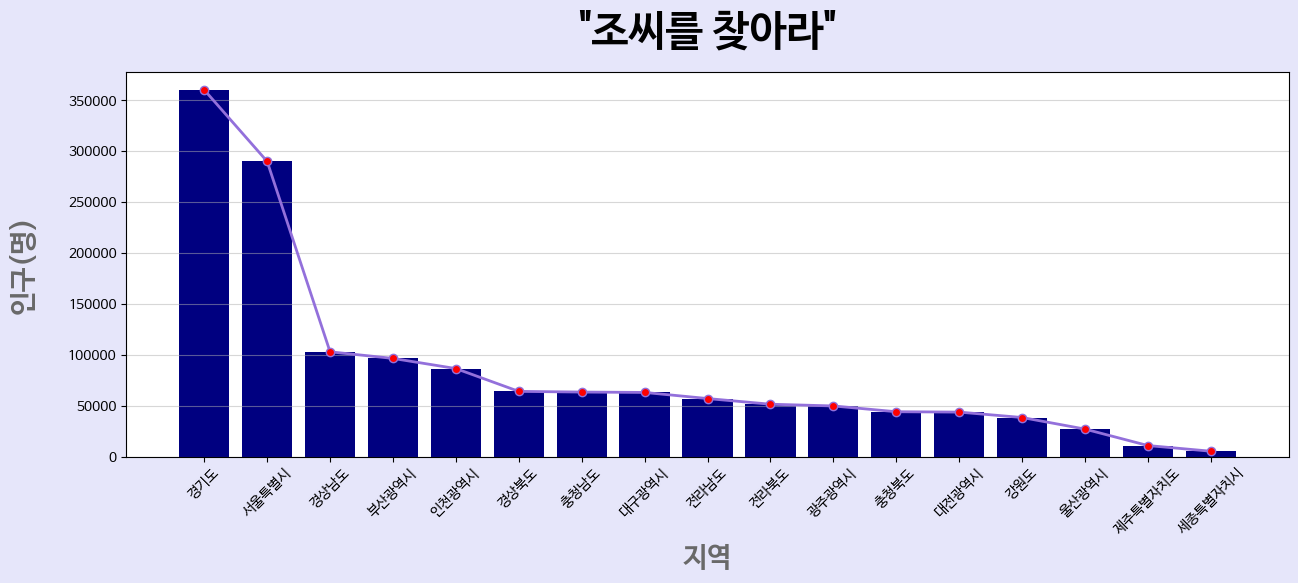

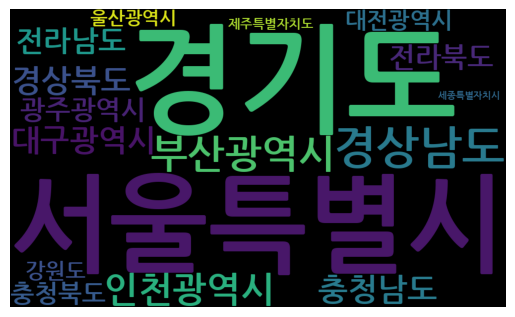

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

family_name = '조'

file = PATH+FILE
df = pd.read_csv(file, encoding = 'utf-8') #cp949: 윈도우OS 기본 인코딩 포맷

# 컬럼 이름 변경하기
df.columns = ['성씨', '지역', '인구']


#------------------------
# 자신의 성씨 데이터 지역별로 합계구하기
#------------------------
# '성씨'열에서 '조'가 포함되고, '지역'열에서 '전국' 제외하여 가져오기
df_my = df[df['성씨'].str.contains(family_name) & (df['지역'] != '전국')]

# 한자를 다르게 쓰는 '구'씨를 '지역'별로 합계 구하기
df_my_group = df_my.groupby('지역').sum(numeric_only=False)

# 지역별 합계 데이터를 '인구' 크기순으로 정렬하기
df_my_group = df_my_group.sort_values(by = '인구', ascending = False)


#------------------------
# 그래프 그리기
#------------------------
x = df_my_group.index    # 지역
y = df_my_group['인구']

plt.figure(figsize = (15, 5), facecolor = 'lavender')
plt.bar(x, y, color = 'navy') # 막대 그래프
plt.plot(x, y, color='mediumpurple', marker='o', linewidth=2, markerfacecolor='red') # 선 그래프

plt.title(f'"{family_name}씨를 찾아라"', fontdict = {'size': 30, 'color': 'black', 'weight': 'bold'}, pad = 20)

plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)
plt.grid(True, axis = 'y', alpha = 0.5)

plt.show()

#------------------------
# 파일명 지정하여 저장하기
#------------------------
file = PATH+'my_family_name.csv'  # 파일명
df_my_group.to_csv(file, encoding = 'cp949', mode = 'w') # 파일 저장하기


#------------------------
# 워드클라우드 지정하여 저장하기
#------------------------
from wordcloud import WordCloud

# 1. (win)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
# font_path = 'malgun'  # C:/Windows/Fonts/
# font_path = 'HMKMMAG' # C:/Windows/Fonts/HMKMMAG.TTF

# 1. (코랩)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'

# 2.전처리된 데이터 지정하기
names = df_my_group.index     # 지역
counts = df_my_group['인구']  # 인구수
data = dict(zip(names, counts)) # 워드클라우드는 딕셔너리 형태로 만들기

# 3.워드클라우드 그래프로 시각화하기
wc = WordCloud(width = 1000, height = 600,
               background_color="black", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data))
plt.axis("off")
plt.show()

# 4.파일로 저장하기
wc.to_file('./조씨_워드클라우드.png')

----------------------------------

THE END

**#### @투명한 이미지(알파값이 적용된)에 워드 클라우드 나타내기**
마스크 이미지 파일이 필요하다.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import cv2
import numpy as np

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정(window에서)
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 코랩에서
# font_path = 'malgun'  # C:/Windows/Fonts/
# font_path = 'H2HDRM' # C:/Windows/Fonts/H2HDRM.TTF


# (토큰명, 빈도수) 딕셔너리 타입으로 변환
names = df_my_group.index.tolist()
counts = df_my_group['인구']
data = dict(zip(names, counts))


# 워드클라우드로 그래프로 시각화
img = cv2.imread('./sample_data/apple.png')
# img = cv2.imread('./sample_data/kids-mask.png')
img_array = np.array(img)
wc = WordCloud(background_color="black",
               font_path=font_path, max_font_size=250, mask=img_array)
plt.imshow(wc.generate_from_frequencies(data))
plt.axis("off")
plt.show()

# 파일로 저장하기
wc.to_file('./사과모양_워드클라우드.png')